<IPython.core.display.Javascript object>


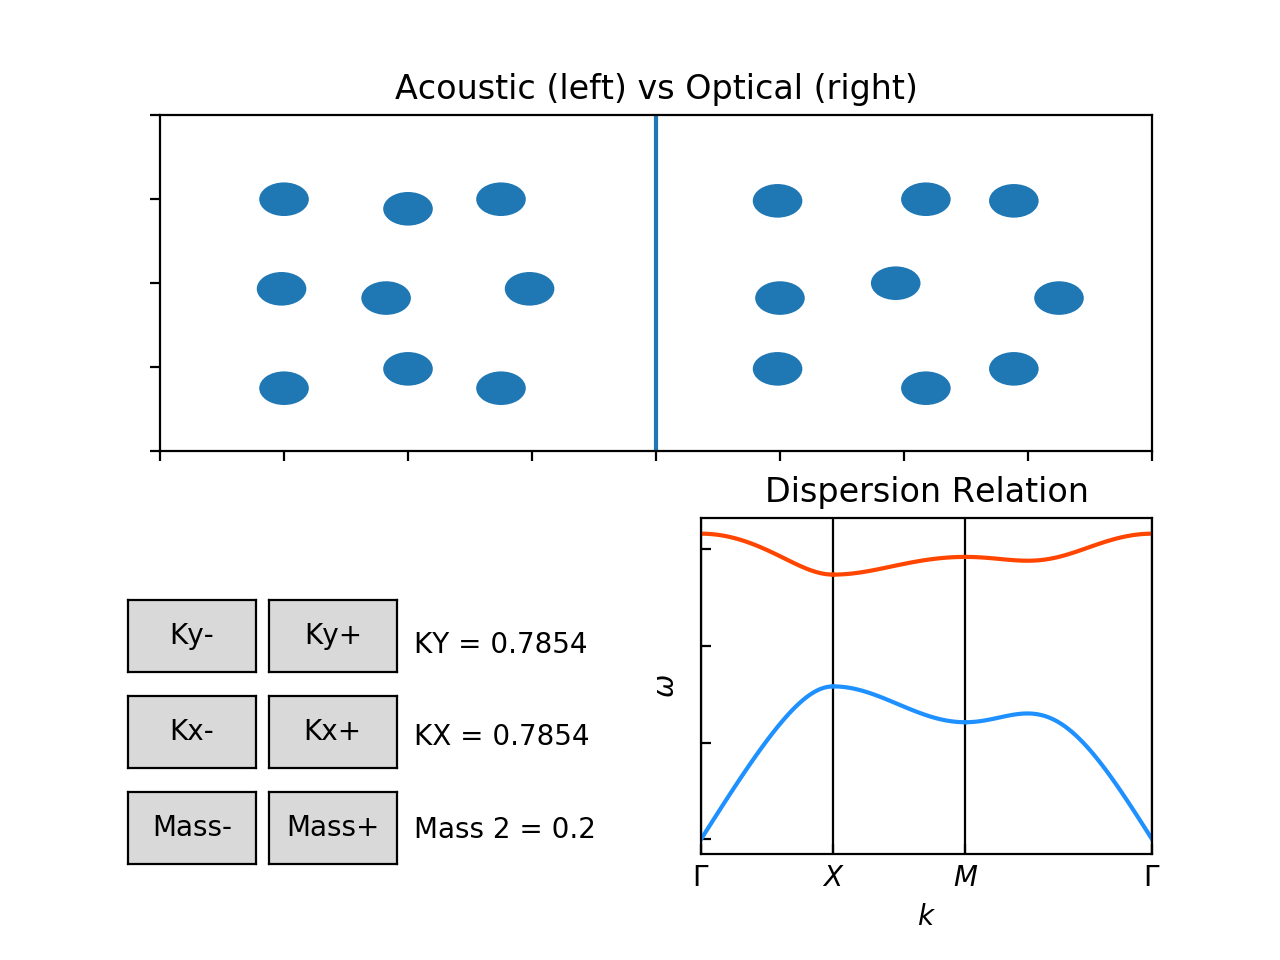

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import ipywidgets as widgets
from matplotlib.widgets import Button
from matplotlib.widgets import CheckButtons

fig = plt.figure()
ax = fig.add_subplot(211)
plt.xlim(-4, 4)
plt.ylim(-2, 2)
plt.title("Acoustic (left) vs Optical (right)")
ax.set_yticklabels([])
ax.set_xticklabels([])
C = 1
mass1 = 0.2

#fig.subplots_adjust(bottom=0.2, top=0.90)

axprev = fig.add_axes([0.1, 0.2, 0.1, 0.075])
axnext = fig.add_axes([0.21, 0.2, 0.1, 0.075])
bnext = Button(axnext, 'Kx+')
bprev = Button(axprev, 'Kx-')

ax2prev = fig.add_axes([0.1, 0.3, 0.1, 0.075])
ax2next = fig.add_axes([0.21, 0.3, 0.1, 0.075])
b2next = Button(ax2next, 'Ky+')
b2prev = Button(ax2prev, 'Ky-')

massprev = fig.add_axes([0.1, 0.1, 0.1, 0.075])
massnext = fig.add_axes([0.21, 0.1, 0.1, 0.075])
massnext = Button(massnext, 'Mass+')
massprev = Button(massprev, 'Mass-')

yvalues = np.arange(-4, 4, 0.1)
xvalues = yvalues - yvalues
ax.plot(xvalues, yvalues)

global kx
kx = np.pi/4

global ky
ky = np.pi/4

global mass2
mass2 = 0.2

ax3 = fig.add_axes([0.32, 0.1, 0.18, 0.275])
ax3.tick_params("both", color='w')
ax3.spines["left"].set_color("w")
ax3.spines["right"].set_color("w")
ax3.spines["top"].set_color("w")
ax3.spines["bottom"].set_color("w")
ax3.yaxis.label.set_color('w')
ax3.xaxis.label.set_color('w')
ax3.set_yticklabels([])
ax3.set_xticklabels([])

ax3.text(x=0.02, y=0.8, s="KY = " + str(np.round(ky, 4)))
ax3.text(x=0.02, y=0.45, s="KX = " + str(np.round(kx, 4)))
ax3.text(x=0.02, y=0.1, s="Mass 2 = " + str(np.round(mass2, 4)))

#plt.text(x=1.5, y=0.3, s=KX =  kx)

def F(n,kx,ky,k,t):
    term1 = (2 * C) / (mass1 * mass2)
    term2 = (mass1 * mass2) ** 2
    term3 = (np.sin(kx / 2)) ** 2
    term4 = (np.sin(ky / 2)) ** 2
    term5 = (np.sin((ky + kx) / 2)) ** 2
    term6 = (np.sin((kx - ky) / 2)) ** 2
    w = np.sqrt(term1 * (mass1 + mass2 + np.sqrt(np.absolute(term2 - (mass1 * mass2) * (term3 + term4 + term5 + term6)))))
    return n + 1/4*(np.cos(k*n-w*t))

def F2(n,kx,ky,k,t):
    term1 = (2 * C) / (mass1 * mass2)
    term2 = (mass1 * mass2) ** 2
    term3 = (np.sin(kx / 2)) ** 2
    term4 = (np.sin(ky / 2)) ** 2
    term5 = (np.sin((ky + kx) / 2)) ** 2
    term6 = (np.sin((kx - ky) / 2)) ** 2
    w = np.sqrt(term1 * (mass1 + mass2 + np.sqrt(np.absolute(term2 - (mass1 * mass2) * (term3 + term4 + term5 + term6)))))
    first = C/((C*2)-((w**2)*mass2))
    second = np.cos(k)*np.cos(k*n-w*t)
    third = np.sin(k)*np.sin(k*n-w*t)
    return n + 1/4*(first*(1+second-third))

def F3(n,kx,ky,k,t):
    term1 = (2 * C) / (mass1 * mass2)
    term2 = (mass1 * mass2) ** 2
    term3 = (np.sin(kx / 2)) ** 2
    term4 = (np.sin(ky / 2)) ** 2
    term5 = (np.sin((ky + kx) / 2)) ** 2
    term6 = (np.sin((kx - ky) / 2)) ** 2
    w = np.sqrt(term1 * (mass1 + mass2 + np.sqrt(np.absolute(term2 - (mass1 * mass2) * (term3 + term4 + term5 + term6)))))
    first = C/((C*2)-((w**2)*mass2))
    second = np.cos(k)*np.cos(k*n-w*t)
    third = np.sin(k)*np.sin(k*n-w*t)
    return n + 1/4*(first*(1+second+third))

patch1 = plt.Circle((-2,0),mass2)
patch2 = plt.Circle((-3,0),0.2)
patch3 = plt.Circle((-1,0),0.2)
patch4 = plt.Circle((-2,1),0.2)
patch5 = plt.Circle((-3,1),mass2)
patch6 = plt.Circle((-1,1),mass2)
patch7 = plt.Circle((-2,-1),0.2)
patch8 = plt.Circle((-3,-1),mass2)
patch9 = plt.Circle((-1,-1),mass2)


patch10 = plt.Circle((2,0),mass2)
patch11 = plt.Circle((1,0),0.2)
patch12 = plt.Circle((3,0),0.2)
patch13 = plt.Circle((2,1),0.2)
patch14 = plt.Circle((1,1),mass2)
patch15 = plt.Circle((3,1),mass2)
patch16 = plt.Circle((2,-1),0.2)
patch17 = plt.Circle((1,-1),mass2)
patch18 = plt.Circle((3,-1),mass2)

"""
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
plt.xlim(-3, 3)
plt.ylim(0, 1.2)
xvalues = np.arange(-3.2, 3.2, 0.1)
term1 = (2 * C) / (mass1 * mass2)
term2 = (mass1 * mass2) ** 2
term3 = (np.sin(xvalues / 2)) ** 2
term4 = (np.sin(xvalues / 2)) ** 2
term5 = (np.sin((xvalues + xvalues) / 2)) ** 2
term6 = (np.sin((xvalues - xvalues) / 2)) ** 2
w = np.sqrt(term1 * (mass1 + mass2 + np.sqrt(np.absolute(term2 - (mass1 * mass2) * (term3 + term4 + term5 + term6)))))
w2 = np.sqrt(term1 * (mass1 + mass2 - np.sqrt(np.absolute(term2 - (mass1 * mass2) * (term3 + term4 + term5 + term6)))))
yvalues = w/np.sqrt(2*C*((1/mass1)+(1/mass2)))
yvalues2 = w2/np.sqrt(2*C*((1/mass1)+(1/mass2)))
ax2.plot(xvalues, yvalues)
ax2.plot(xvalues, yvalues2)
"""
ax2 = fig.add_subplot(224)
ax2.set_yticklabels([])
ax2.set_xticklabels([])

C = 1
a = 1

def posw(kx,ky):
    branch = np.sqrt((mass1+mass2)**2-(mass1*mass2)*(np.sin(kx*a/2)**2 + np.sin(ky*a/2)**2 + np.sin((kx+ky)*a/2)**2 + np.sin((kx-ky)*a/2)**2))
    return np.sqrt(2*C/mass1/mass2*(mass1+mass2 + branch))

def negw(kx,ky):
    branch = np.sqrt((mass1+mass2)**2-(mass1*mass2)*(np.sin(kx*a/2)**2 + np.sin(ky*a/2)**2 + np.sin((kx+ky)*a/2)**2 + np.sin((kx-ky)*a/2)**2))
    return np.sqrt(2*C/mass1/mass2*(mass1+mass2 - branch))

k = np.linspace(0, np.pi ,50)/a

plt.plot(k,posw(k,0),color='orangered')
plt.plot(k,negw(k,0),color='dodgerblue')

plt.plot(k+np.pi/a,posw(np.pi/a,k),color='orangered')
plt.plot(k+np.pi/a,negw(np.pi/a,k),color='dodgerblue')

plt.plot(np.sqrt(2)*k+2*np.pi/a,posw(np.pi/a-k,np.pi/a-k),color='orangered')
plt.plot(np.sqrt(2)*k+2*np.pi/a,negw(np.pi/a-k,np.pi/a-k),color='dodgerblue')

ax2.set_title("Dispersion Relation")
ax2.xaxis.grid(True,color='black')
ax2.tick_params(axis='both', direction='in')
plt.ylabel('$\omega$')
plt.xlabel('$k$',fontweight='bold')
plt.xticks(ticks=[0,np.pi/a,2*np.pi/a,(2+np.sqrt(2))*np.pi/a], labels=['$\Gamma$','$X$','$M$','$\Gamma$'])
plt.xlim(0,(2+np.sqrt(2))*np.pi/a)
#plt.ylim(0,5)

def init():
    patch1.center = (-2,0)
    patch2.center = (-3,0)
    patch3.center = (-1,0)
    patch4.center = (-2,1)
    patch5.center = (-3,1)
    patch6.center = (-1,1)
    patch7.center = (-2,-1)
    patch8.center = (-3,-1)
    patch9.center = (-1,-1)
    ax.add_patch(patch1)
    ax.add_patch(patch2)
    ax.add_patch(patch3)
    ax.add_patch(patch4)
    ax.add_patch(patch5)
    ax.add_patch(patch6)
    ax.add_patch(patch7)
    ax.add_patch(patch8)
    ax.add_patch(patch9)

    patch10.center = (2, 0)
    patch11.center = (1, 0)
    patch12.center = (3, 0)
    patch13.center = (2, 1)
    patch14.center = (1, 1)
    patch15.center = (3, 1)
    patch16.center = (2, -1)
    patch17.center = (1, -1)
    patch18.center = (3, -1)
    ax.add_patch(patch10)
    ax.add_patch(patch11)
    ax.add_patch(patch12)
    ax.add_patch(patch13)
    ax.add_patch(patch14)
    ax.add_patch(patch15)
    ax.add_patch(patch16)
    ax.add_patch(patch17)
    ax.add_patch(patch18)
    return (patch1, patch2, patch3, patch4, patch5, patch6, patch7, patch8, patch9, patch10, patch11, patch12,
    patch13, patch14, patch15, patch16, patch17, patch18)


def animate(t):
    patch1.radius = mass2
    patch5.radius = mass2
    patch6.radius = mass2
    patch8.radius = mass2
    patch9.radius = mass2
    patch1.center = (F(-2, kx, ky, kx, t), F(0, kx, ky, ky, t))
    patch2.center = (F2(-3, kx, ky, kx, t), F2(0, kx, ky, ky, t))
    patch3.center = (F2(-1, kx, ky, kx, t), F2(0, kx, ky, ky, t))
    patch4.center = (F2(-2, kx, ky, kx, t), F2(1, kx, ky, ky, t))
    patch5.center = (F(-3, kx, ky, kx, t), F(1, kx, ky, ky, t))
    patch6.center = (F(-1, kx, ky, kx, t), F(1, kx, ky, ky, t))
    patch7.center = (F2(-2, kx, ky, kx, t), F2(-1, kx, ky, ky, t))
    patch8.center = (F(-3, kx, ky, kx, t), F(-1, kx, ky, ky, t))
    patch9.center = (F(-1, kx, ky, kx, t), F(-1, kx, ky, ky, t))

    patch10.radius = mass2
    patch14.radius = mass2
    patch15.radius = mass2
    patch17.radius = mass2
    patch18.radius = mass2
    patch10.center = (F3(2, kx, ky, kx, t), F3(0, kx, ky, ky, t))
    patch11.center = (F(1, kx, ky, kx, t), F(0, kx, ky, ky, t))
    patch12.center = (F(3, kx, ky, kx, t), F(0, kx, ky, ky, t))
    patch13.center = (F(2, kx, ky, kx, t), F(1, kx, ky, ky, t))
    patch14.center = (F3(1, kx, ky, kx, t), F3(1, kx, ky, ky, t))
    patch15.center = (F3(3, kx, ky, kx, t), F3(1, kx, ky, ky, t))
    patch16.center = (F(2, kx, ky, kx, t), F(-1, kx, ky, ky, t))
    patch17.center = (F3(1, kx, ky, kx, t), F3(-1, kx, ky, ky, t))
    patch18.center = (F3(3, kx, ky, kx, t), F3(-1, kx, ky, ky, t))
    return (patch1, patch2, patch3, patch4, patch5, patch6, patch7, patch8, patch9, patch10, patch11, patch12, patch13
            ,patch14, patch15, patch16, patch17, patch18)

class Index():

    def next(self, event):
        global kx
        ax2.cla()
        ax3.cla()
        kx += np.pi/6

        ax3.set_yticklabels([])
        ax3.set_xticklabels([])
        ax3.text(x=0.02, y=0.8, s="KY = " + str(np.round(ky, 4)))
        ax3.text(x=0.02, y=0.45, s="KX = " + str(np.round(kx, 4)))
        ax3.text(x=0.02, y=0.1, s="Mass 2 = " + str(np.round(mass2, 4)))

        ax2.set_yticklabels([])
        ax2.set_xticklabels([])

        plt.plot(k, posw(k, 0), color='orangered')
        plt.plot(k, negw(k, 0), color='dodgerblue')

        plt.plot(k + np.pi / a, posw(np.pi / a, k), color='orangered')
        plt.plot(k + np.pi / a, negw(np.pi / a, k), color='dodgerblue')

        plt.plot(np.sqrt(2) * k + 2 * np.pi / a, posw(np.pi / a - k, np.pi / a - k), color='orangered')
        plt.plot(np.sqrt(2) * k + 2 * np.pi / a, negw(np.pi / a - k, np.pi / a - k), color='dodgerblue')

        ax2.xaxis.grid(True, color='black')
        ax2.tick_params(axis='both', direction='in')
        plt.ylabel('$\omega$')
        plt.xlabel('$k$', fontweight='bold')
        plt.xticks(ticks=[0, np.pi / a, 2 * np.pi / a, (2 + np.sqrt(2)) * np.pi / a],
                   labels=['$\Gamma$', '$X$', '$M$', '$\Gamma$'])
        plt.xlim(0, (2 + np.sqrt(2)) * np.pi / a)

    def prev(self, event):
        global kx
        ax2.cla()
        ax3.cla()
        kx -= np.pi/6

        ax3.set_yticklabels([])
        ax3.set_xticklabels([])
        ax3.text(x=0.02, y=0.8, s="KY = " + str(np.round(ky, 4)))
        ax3.text(x=0.02, y=0.45, s="KX = " + str(np.round(kx, 4)))
        ax3.text(x=0.02, y=0.1, s="Mass 2 = " + str(np.round(mass2, 4)))

        ax2.set_yticklabels([])
        ax2.set_xticklabels([])

        plt.plot(k, posw(k, 0), color='orangered')
        plt.plot(k, negw(k, 0), color='dodgerblue')

        plt.plot(k + np.pi / a, posw(np.pi / a, k), color='orangered')
        plt.plot(k + np.pi / a, negw(np.pi / a, k), color='dodgerblue')

        plt.plot(np.sqrt(2) * k + 2 * np.pi / a, posw(np.pi / a - k, np.pi / a - k), color='orangered')
        plt.plot(np.sqrt(2) * k + 2 * np.pi / a, negw(np.pi / a - k, np.pi / a - k), color='dodgerblue')

        ax2.xaxis.grid(True, color='black')
        ax2.tick_params(axis='both', direction='in')
        plt.ylabel('$\omega$')
        plt.xlabel('$k$', fontweight='bold')
        plt.xticks(ticks=[0, np.pi / a, 2 * np.pi / a, (2 + np.sqrt(2)) * np.pi / a],
                   labels=['$\Gamma$', '$X$', '$M$', '$\Gamma$'])
        plt.xlim(0, (2 + np.sqrt(2)) * np.pi / a)

    def next2(self, event):
        global ky
        ax2.cla()
        ax3.cla()
        ky += np.pi/6

        ax3.set_yticklabels([])
        ax3.set_xticklabels([])
        ax3.text(x=0.02, y=0.8, s="KY = " + str(np.round(ky, 4)))
        ax3.text(x=0.02, y=0.45, s="KX = " + str(np.round(kx, 4)))
        ax3.text(x=0.02, y=0.1, s="Mass 2 = " + str(np.round(mass2, 4)))

        ax2.set_yticklabels([])
        ax2.set_xticklabels([])

        plt.plot(k, posw(k, 0), color='orangered')
        plt.plot(k, negw(k, 0), color='dodgerblue')

        plt.plot(k + np.pi / a, posw(np.pi / a, k), color='orangered')
        plt.plot(k + np.pi / a, negw(np.pi / a, k), color='dodgerblue')

        plt.plot(np.sqrt(2) * k + 2 * np.pi / a, posw(np.pi / a - k, np.pi / a - k), color='orangered')
        plt.plot(np.sqrt(2) * k + 2 * np.pi / a, negw(np.pi / a - k, np.pi / a - k), color='dodgerblue')

        ax2.xaxis.grid(True, color='black')
        ax2.tick_params(axis='both', direction='in')
        plt.ylabel('$\omega$')
        plt.xlabel('$k$', fontweight='bold')
        plt.xticks(ticks=[0, np.pi / a, 2 * np.pi / a, (2 + np.sqrt(2)) * np.pi / a],
                   labels=['$\Gamma$', '$X$', '$M$', '$\Gamma$'])
        plt.xlim(0, (2 + np.sqrt(2)) * np.pi / a)

    def prev2(self, event):
        global ky
        ax2.cla()
        ax3.cla()
        ky -= np.pi/6

        ax3.set_yticklabels([])
        ax3.set_xticklabels([])
        ax3.text(x=0.02, y=0.8, s="KY = " + str(np.round(ky, 4)))
        ax3.text(x=0.02, y=0.45, s="KX = " + str(np.round(kx, 4)))
        ax3.text(x=0.02, y=0.1, s="Mass 2 = " + str(np.round(mass2, 4)))

        ax2.set_yticklabels([])
        ax2.set_xticklabels([])

        plt.plot(k, posw(k, 0), color='orangered')
        plt.plot(k, negw(k, 0), color='dodgerblue')

        plt.plot(k + np.pi / a, posw(np.pi / a, k), color='orangered')
        plt.plot(k + np.pi / a, negw(np.pi / a, k), color='dodgerblue')

        plt.plot(np.sqrt(2) * k + 2 * np.pi / a, posw(np.pi / a - k, np.pi / a - k), color='orangered')
        plt.plot(np.sqrt(2) * k + 2 * np.pi / a, negw(np.pi / a - k, np.pi / a - k), color='dodgerblue')

        ax2.xaxis.grid(True, color='black')
        ax2.tick_params(axis='both', direction='in')
        plt.ylabel('$\omega$')
        plt.xlabel('$k$', fontweight='bold')
        plt.xticks(ticks=[0, np.pi / a, 2 * np.pi / a, (2 + np.sqrt(2)) * np.pi / a],
                   labels=['$\Gamma$', '$X$', '$M$', '$\Gamma$'])
        plt.xlim(0, (2 + np.sqrt(2)) * np.pi / a)

    def massnext(self, event):
        global mass2
        ax2.cla()
        ax3.cla()
        mass2 += 0.05

        ax3.set_yticklabels([])
        ax3.set_xticklabels([])
        ax3.text(x=0.02, y=0.8, s="KY = " + str(np.round(ky, 4)))
        ax3.text(x=0.02, y=0.45, s="KX = " + str(np.round(kx, 4)))
        ax3.text(x=0.02, y=0.1, s="Mass 2 = " + str(np.round(mass2, 4)))

        ax2.set_yticklabels([])
        ax2.set_xticklabels([])

        plt.plot(k, posw(k, 0), color='orangered')
        plt.plot(k, negw(k, 0), color='dodgerblue')

        plt.plot(k + np.pi / a, posw(np.pi / a, k), color='orangered')
        plt.plot(k + np.pi / a, negw(np.pi / a, k), color='dodgerblue')

        plt.plot(np.sqrt(2) * k + 2 * np.pi / a, posw(np.pi / a - k, np.pi / a - k), color='orangered')
        plt.plot(np.sqrt(2) * k + 2 * np.pi / a, negw(np.pi / a - k, np.pi / a - k), color='dodgerblue')

        ax2.xaxis.grid(True, color='black')
        ax2.tick_params(axis='both', direction='in')
        plt.ylabel('$\omega$')
        plt.xlabel('$k$', fontweight='bold')
        plt.xticks(ticks=[0, np.pi / a, 2 * np.pi / a, (2 + np.sqrt(2)) * np.pi / a],
                   labels=['$\Gamma$', '$X$', '$M$', '$\Gamma$'])
        plt.xlim(0, (2 + np.sqrt(2)) * np.pi / a)

    def massprev(self, event):
        global mass2
        ax2.cla()
        ax3.cla()
        mass2 -= 0.05

        ax3.set_yticklabels([])
        ax3.set_xticklabels([])
        ax3.text(x=0.02, y=0.8, s="KY = " + str(np.round(ky, 4)))
        ax3.text(x=0.02, y=0.45, s="KX = " + str(np.round(kx, 4)))
        ax3.text(x=0.02, y=0.1, s="Mass 2 = " + str(np.round(mass2, 4)))

        ax2.set_yticklabels([])
        ax2.set_xticklabels([])

        plt.plot(k, posw(k, 0), color='orangered')
        plt.plot(k, negw(k, 0), color='dodgerblue')

        plt.plot(k + np.pi / a, posw(np.pi / a, k), color='orangered')
        plt.plot(k + np.pi / a, negw(np.pi / a, k), color='dodgerblue')

        plt.plot(np.sqrt(2) * k + 2 * np.pi / a, posw(np.pi / a - k, np.pi / a - k), color='orangered')
        plt.plot(np.sqrt(2) * k + 2 * np.pi / a, negw(np.pi / a - k, np.pi / a - k), color='dodgerblue')

        ax2.xaxis.grid(True, color='black')
        ax2.tick_params(axis='both', direction='in')
        plt.ylabel('$\omega$')
        plt.xlabel('$k$', fontweight='bold')
        plt.xticks(ticks=[0, np.pi / a, 2 * np.pi / a, (2 + np.sqrt(2)) * np.pi / a],
                   labels=['$\Gamma$', '$X$', '$M$', '$\Gamma$'])
        plt.xlim(0, (2 + np.sqrt(2)) * np.pi / a)


callback = Index()
bnext.on_clicked(callback.next)
bprev.on_clicked(callback.prev)
b2next.on_clicked(callback.next2)
b2prev.on_clicked(callback.prev2)
massnext.on_clicked(callback.massnext)
massprev.on_clicked(callback.massprev)

anim = animation.FuncAnimation(fig, animate, init_func=init,frames=58, interval=150, blit=False)